# QuTiP example: Single-Qubit Dynamics

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *

In [5]:
def qubit_integrate(epsilon, delta, g1, g2, solver):

    H = epsilon / 2.0 * sigmaz() + delta / 2.0 * sigmax()
        
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
        
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, [sigmax(), sigmay(), sigmaz()])  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

In [6]:
epsilon = 0.0 * 2 * np.pi   # cavity frequency
delta   = 1.0 * 2 * np.pi   # atom frequency
g2 = 0.15
g1 = 0.0

# intial state
psi0 = basis(2,0)

tlist = np.linspace(0,5,200)

# analytics
sx_analytic = np.zeros(shape(tlist))
sy_analytic = -np.sin(2*np.pi*tlist) * np.exp(-tlist * g2)
sz_analytic = np.cos(2*np.pi*tlist) * np.exp(-tlist * g2)

In [7]:
sx1, sy1, sz1 = qubit_integrate(epsilon, delta, g1, g2, "me")

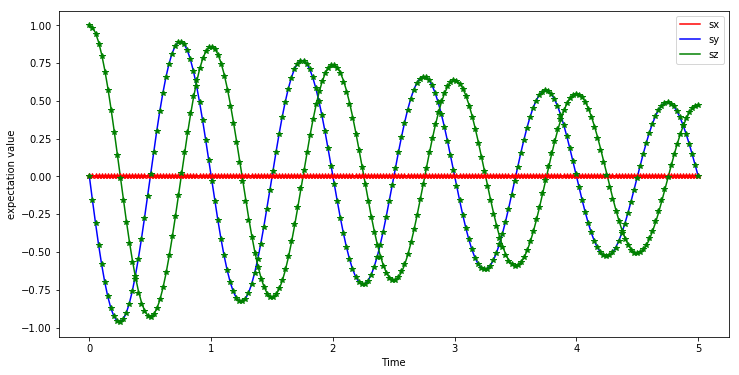

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx1), 'r')
ax.plot(tlist, np.real(sy1), 'b')
ax.plot(tlist, np.real(sz1), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'g*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

In [9]:
sx2, sy2, sz2 = qubit_integrate(epsilon, delta, 0, 0, "me")

In [10]:
# analytics
sx_analytic = np.zeros(np.shape(tlist))
sy_analytic = -np.sin(2*np.pi*tlist)
sz_analytic = np.cos(2*np.pi*tlist)

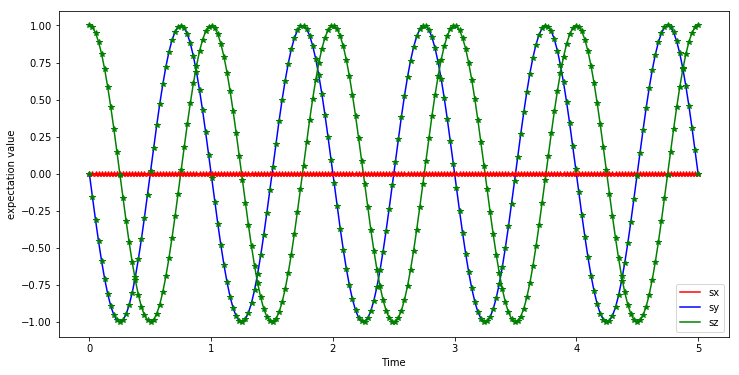

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx2), 'r')
ax.plot(tlist, np.real(sy2), 'b')
ax.plot(tlist, np.real(sz2), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'g*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

## Bloch sphere

In [12]:
w     = 1.0 * 2 * np.pi   # qubit angular frequency
theta = 0.2 * np.pi       # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.05      # qubit relaxation rate
gamma2 = 0.02      # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a * basis(2,0) + (1-a)*basis(2,1))/(np.sqrt(a**2 + (1-a)**2))
tlist = np.linspace(0,15,1000)

In [13]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # Hamiltonian
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    sm = sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # zero temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)
    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output.expect[0], output.expect[1], output.expect[2]

In [14]:
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

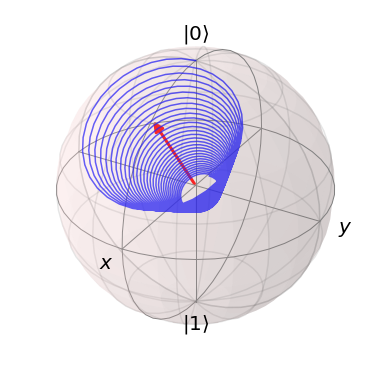

In [15]:
sphere=Bloch()
sphere.add_points([sx,sy,sz], meth='l')
sphere.vector_color = ['r']
sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
sphere.show()

## Versions

In [16]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
